<center><h1>Bank data Analyis</h1></center>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
data = pd.read_csv("bank-full.csv")
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [84]:
data.shape  # shape

(45211, 17)

In [85]:
data.size  # size

768587

In [86]:
data.columns # all columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [87]:
data_list = dict(data.dtypes)
keys = data_list.keys()
values = data_list.values()
All_data_types = pd.DataFrame(zip(keys, values),columns = ['Columns','Data types'])
All_data_types

,Columns,Data types
0,age,int64
1,job,object
2,marital,object
3,education,object
4,default,object
5,balance,int64
6,housing,object
7,loan,object
8,contact,object
9,day,int64


#### extracting Object types of columns

In [88]:
cat_cols_names = []
data_types = dict(data.dtypes)
for key,value in data_types.items():
    if value != 'int64':                                # extracting Object types of columns
        cat_cols_names.append(key)
pd.DataFrame(cat_cols_names,columns = ['object type'])

,object type
0,job
1,marital
2,education
3,default
4,housing
5,loan
6,contact
7,month
8,poutcome
9,Target


#### extracting integer types of columns

In [89]:
num_cols_name = []
data_types = dict(data.dtypes)
for key,value in data_types.items():
    if value != 'object':                                     # extracting integer types of columns
        num_cols_name.append(key)
pd.DataFrame(num_cols_name,columns = ['Int type'])

,Int type
0,age
1,balance
2,day
3,duration
4,campaign
5,pdays
6,previous


In [90]:
data.isnull()      # Checking the data is null or not

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [91]:
data.isnull().sum()       # The sum of  all null data 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [92]:
data.head(15)        # contineu from next chapter

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### Catogirical column analysis

In [93]:
cat_data = data.select_dtypes(include = 'object')
cat_data.to_csv('bank-categorical_data.csv',index = False)
cat_data                                                   # Categorical data

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [94]:
num_data = data.select_dtypes(exclude = 'object')
num_data                                          # Numerical Data

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


- Creating a folder to save the frequency data  and charts

In [95]:
import os
cwd = os.getcwd()
folder_name = 'Frequency_tables'
new_dir = os.path.join(cwd,folder_name)
try:
    os.makedirs(new_dir)
except Exception as e:
    print('The exception handelled successfully and created a file')
new_dir

'C:\\Users\\Pankaj\\Jupyter\\Frequency_tables'

- job frequency counts


In [96]:
# job counts
no_of_jobs = dict(cat_data['job'].value_counts())
keys = no_of_jobs.keys()
values = no_of_jobs.values()
job_counts= pd.DataFrame(zip(keys, values),columns = ['Jobs','No.of Jobs'])        # Counting the total no. of jobs
job_counts.to_csv('C:\\Users\\Pankaj\\Jupyter\\Frequency_tables\\job_count_frequency.csv', index = False)
job_counts

,Jobs,No.of Jobs
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154
5,retired,2264
6,self-employed,1579
7,entrepreneur,1487
8,unemployed,1303
9,housemaid,1240


- job count frequency table

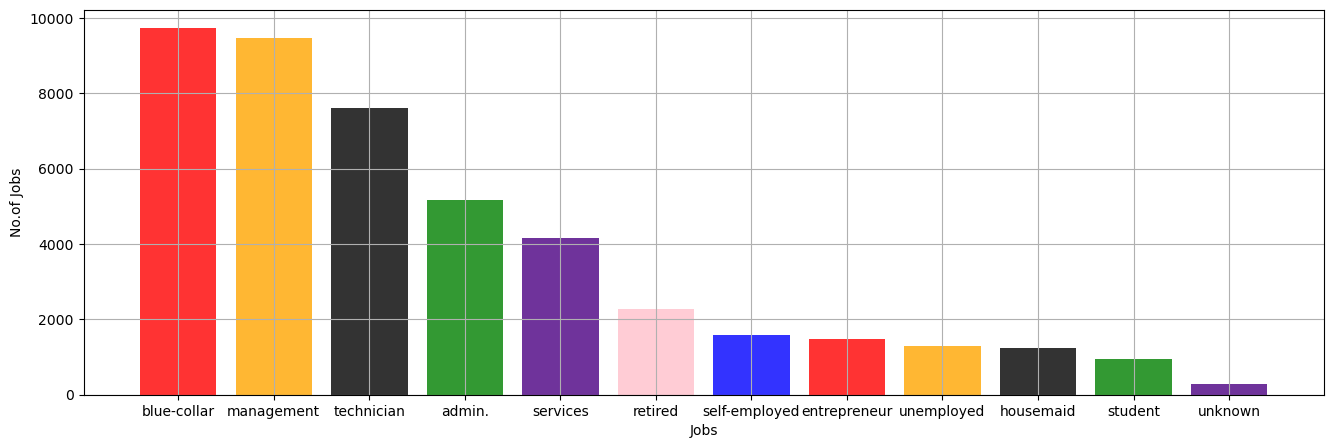

<Figure size 640x480 with 0 Axes>

In [97]:
plt.figure(figsize= (16,5))
plt.xlabel('Jobs')
plt.ylabel('No.of Jobs')
plt.bar(job_counts['Jobs'],job_counts['No.of Jobs'],color = ['red','orange','black','green','indigo','pink','blue'],alpha = 0.8)
plt.grid(visible = True)
plt.show()
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Frequency_tables\\job_counts_chart.png',edgecolor='auto')

- maritial status frequency value counts

In [98]:
# maritial status counts

marital_status = dict(data['marital'].value_counts())
keys = marital_status.keys()
values = marital_status.values()
marital_status_count = pd.DataFrame(zip(keys, values),columns = ['Marital status','Counts'])        # Counting the total no. of jobs
marital_status_count.to_csv('C:\\Users\\Pankaj\\Jupyter\\Frequency_tables\\Marital_stetus.csv',index = False)
marital_status_count

,Marital status,Counts
0,married,27214
1,single,12790
2,divorced,5207


- Education frequency counts

In [99]:
no_of_education = dict(data['education'].value_counts())
keys = no_of_education.keys()
values = no_of_education.values()
education_count= pd.DataFrame(zip(keys, values),columns = ['Education','No.of Educators '])        # Counting the total no. of jobs
education_count.to_csv('C:\\Users\\Pankaj\\Jupyter\\Frequency_tables\\Education_frequency_count.csv',index = False)
education_count

,Education,No.of Educators
0,secondary,23202
1,tertiary,13301
2,primary,6851
3,unknown,1857


- Default frequency counts

In [100]:
no_of_default = dict(data['default'].value_counts())
keys = no_of_default.keys()
values = no_of_default.values()
default_count= pd.DataFrame(zip(keys, values),columns = ['default','No.of defaulters'])        # Counting the total no. of jobs
default_count.to_csv('C:\\Users\\Pankaj\\Jupyter\\Frequency_tables\\Default_frequency_count.csv',index = False)
default_count

,default,No.of defaulters
0,no,44396
1,yes,815


- Housing frequency counts

In [101]:
no_of_housing = dict(data['housing'].value_counts())
keys = no_of_housing.keys()
values = no_of_housing.values()
housing_count= pd.DataFrame(zip(keys, values),columns = ['housing','No.of housing'])        # Counting the total no. of jobs
housing_count.to_csv('C:\\Users\\Pankaj\\Jupyter\\Frequency_tables\\Housing_frequency_count.csv',index = False)
housing_count

,housing,No.of housing
0,yes,25130
1,no,20081


- loan frequency count

In [102]:
no_of_loan = dict(data['loan'].value_counts())
keys = no_of_loan.keys()
values = no_of_loan.values()
loan_count= pd.DataFrame(zip(keys, values),columns = ['loan','No.of loan isuers'])        # Counting the total no. of jobs
loan_count.to_csv('C:\\Users\\Pankaj\\Jupyter\\Frequency_tables\\loan_frequency_count.csv',index = False)
loan_count

,loan,No.of loan isuers
0,no,37967
1,yes,7244


- Contact frequency count

In [103]:
no_of_contact = dict(data['contact'].value_counts())
keys = no_of_contact.keys()
values = no_of_contact.values()
contact_count= pd.DataFrame(zip(keys, values),columns = ['contact','No.of contact'])        # Counting the total no. of jobs
contact_count.to_csv('C:\\Users\\Pankaj\\Jupyter\\Frequency_tables\\contact_frequency_count.csv',index = False)
contact_count

,contact,No.of contact
0,cellular,29285
1,unknown,13020
2,telephone,2906


- Months frequency count

In [104]:
no_of_months = dict(data['month'].value_counts())
keys = no_of_months.keys()
values = no_of_months.values()
months_count= pd.DataFrame(zip(keys, values),columns = ['month','No.of month'])        # Counting the total no. of jobs
months_count.to_csv('C:\\Users\\Pankaj\\Jupyter\\Frequency_tables\\months_frequency_count.csv',index = False)
months_count

,month,No.of month
0,may,13766
1,jul,6895
2,aug,6247
3,jun,5341
4,nov,3970
5,apr,2932
6,feb,2649
7,jan,1403
8,oct,738
9,sep,579


- Poutcome frequency count

In [105]:
no_of_poutcome = dict(data['poutcome'].value_counts())
keys = no_of_poutcome.keys()
values = no_of_poutcome.values()
poutcome_count= pd.DataFrame(zip(keys, values),columns = ['poutcom','No.of poutcomes'])        # Counting the total no. of jobs
poutcome_count.to_csv('poutcome_frequency_count.csv',index = False)
poutcome_count

,poutcom,No.of poutcomes
0,unknown,36959
1,failure,4901
2,other,1840
3,success,1511


- Target frequency count

In [106]:
no_of_Targets = dict(data['Target'].value_counts())
keys = no_of_Targets.keys()
values = no_of_Targets.values()
Targets_count= pd.DataFrame(zip(keys, values),columns = ['Targets','No.of Targets'])        # Counting the total no. of jobs
Targets_count.to_csv('C:\\Users\\Pankaj\\Jupyter\\Frequency_tables\\targets_frequency_count.csv',index = False)
Targets_count

,Targets,No.of Targets
0,no,39922
1,yes,5289


- Frequency count charts

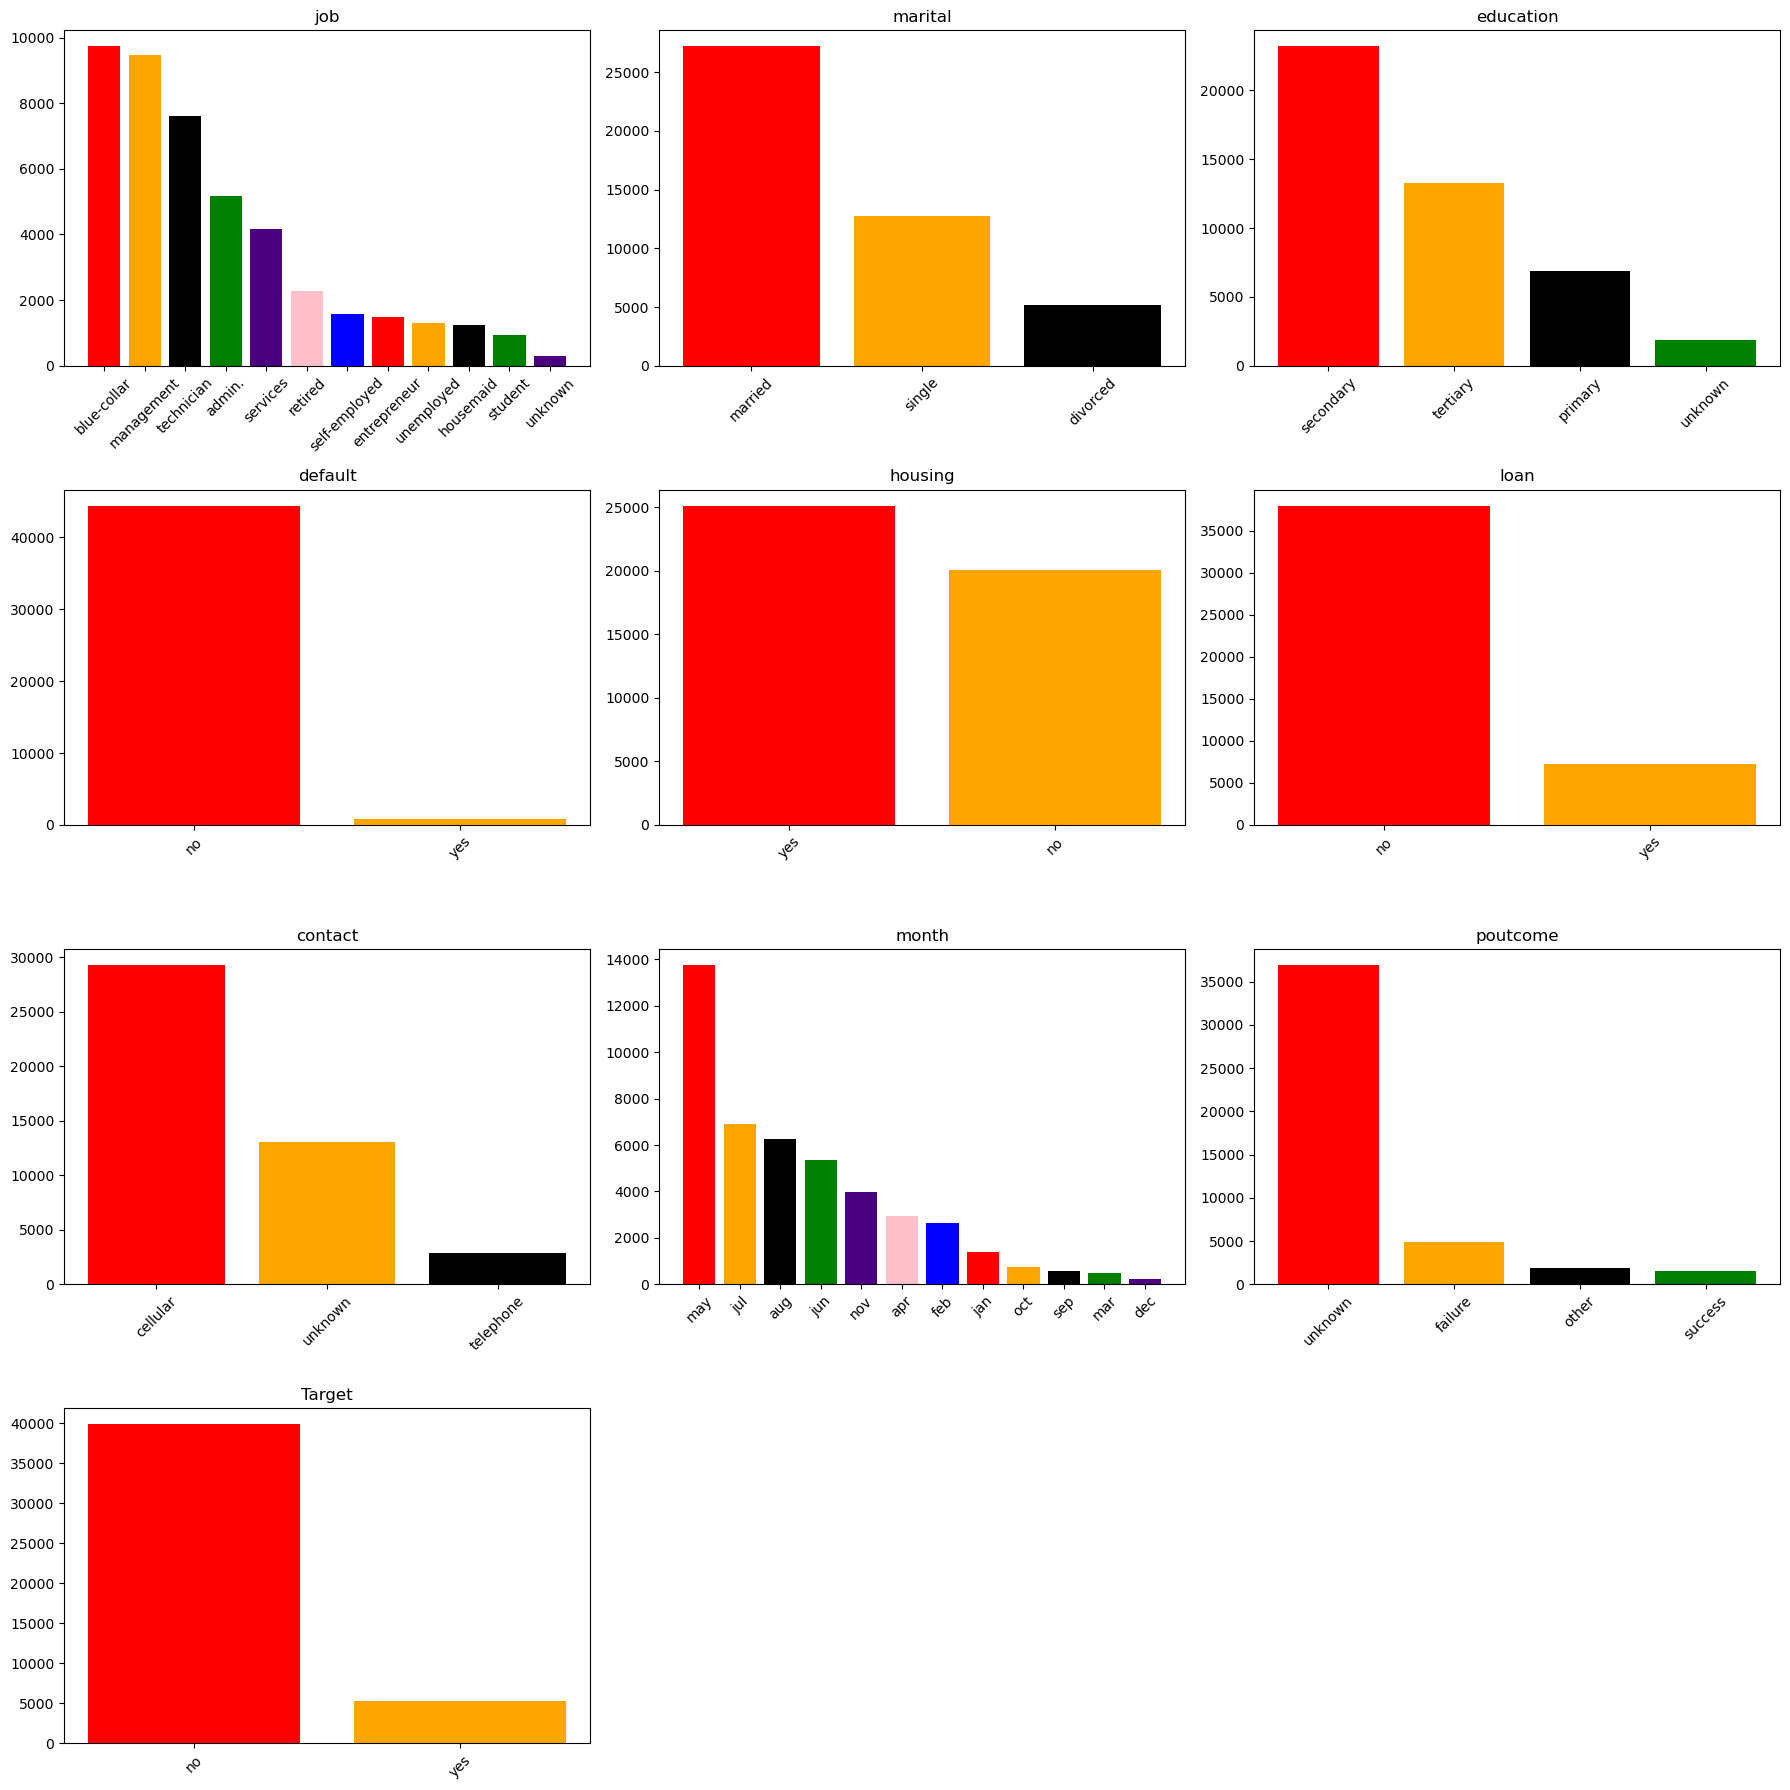

In [107]:
cols = len(cat_data.columns)
rows = int((cols + 2) / 3)  # Standard division with rounding up
plt.figure(figsize=(18, 18))
for i in range(cols):
    plt.subplot(rows, 3, i + 1)
    value_counts = cat_data[cat_data.columns[i]].value_counts()
    plt.bar(value_counts.index.astype(str), value_counts.values, color = ['red','orange','black','green','indigo','pink','blue'])
    plt.title(cat_data.columns[i])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Frequency_tables\\frequency_count_charts.jpg')
plt.show()

# saved figure

- Frequency count pie charts

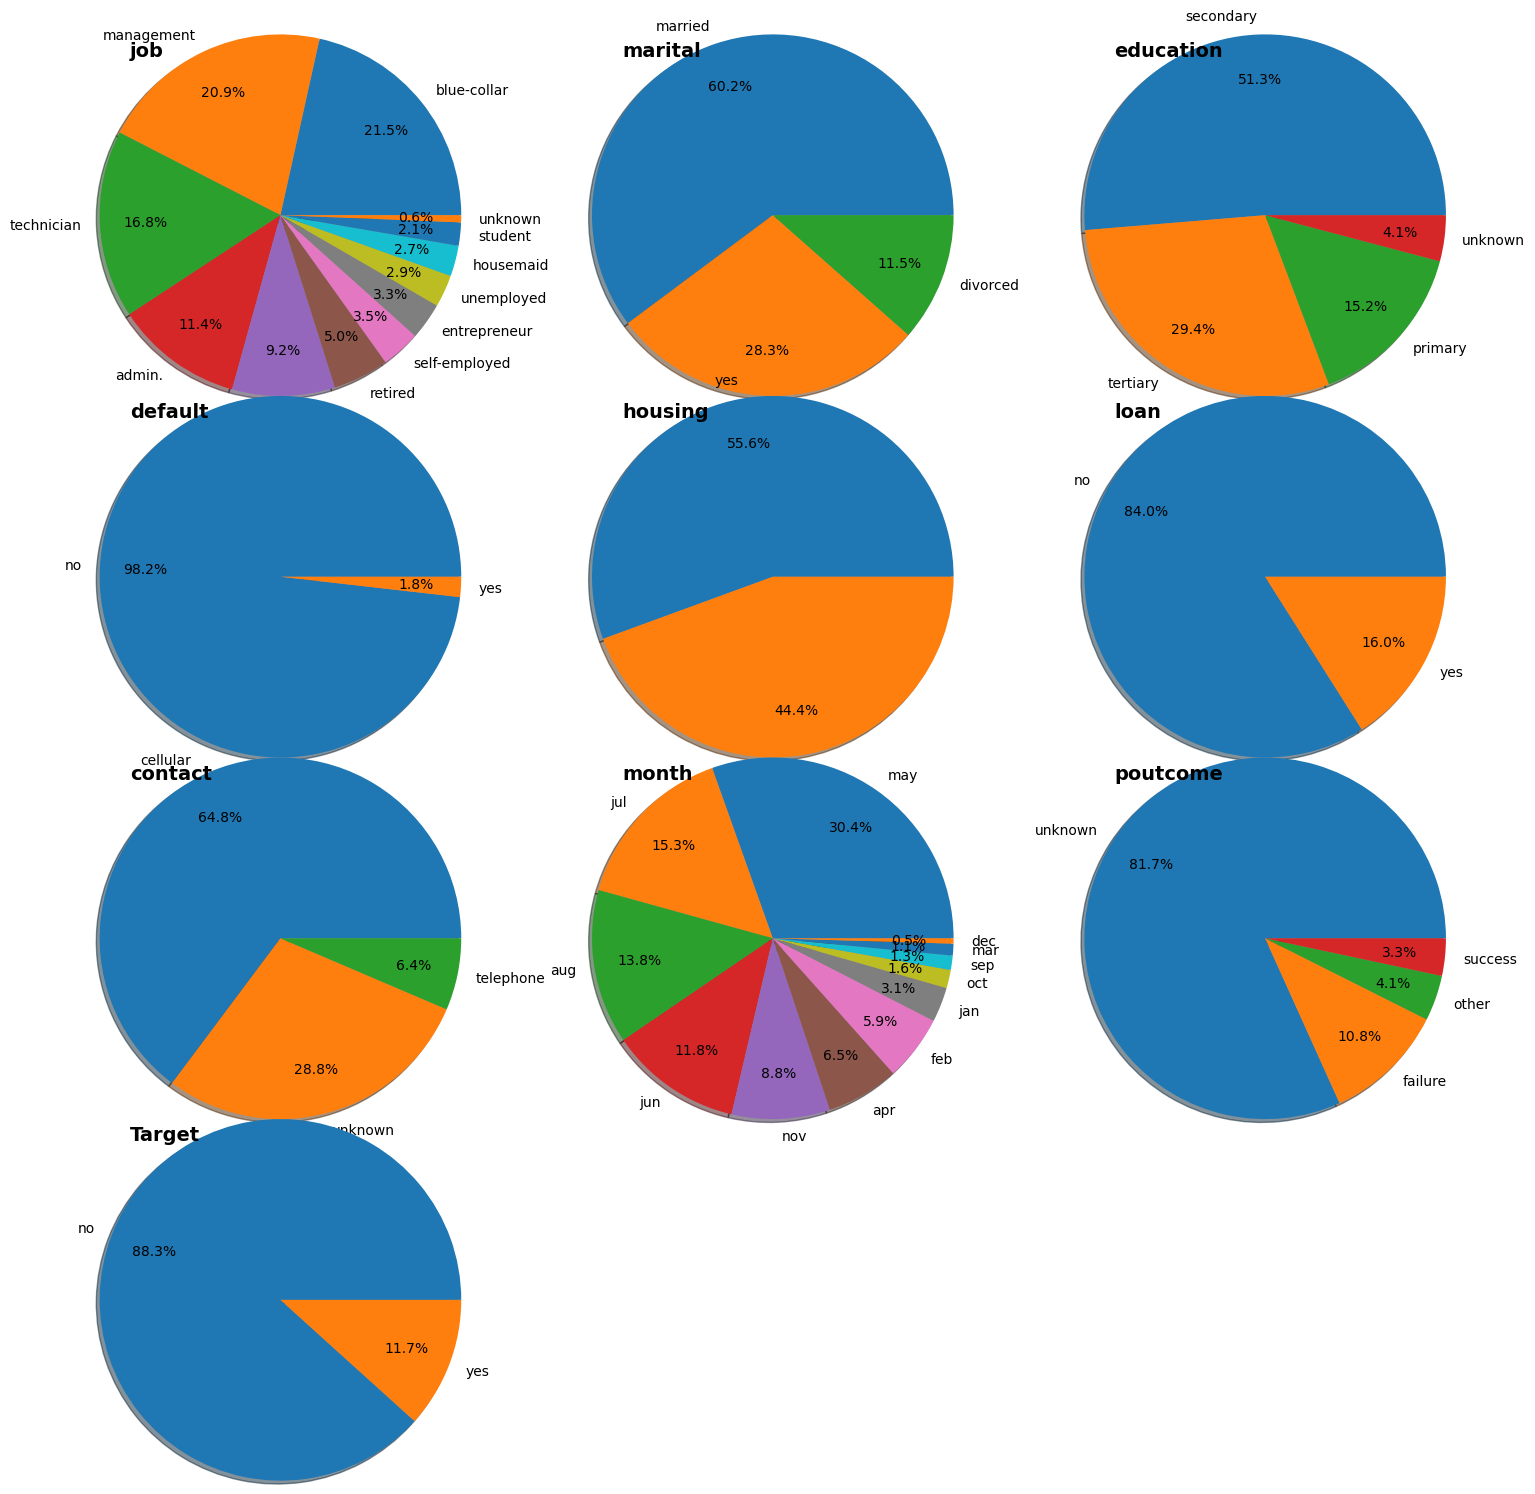

In [108]:
cols = len(cat_data.columns)
rows = int((cols + 2) / 3)  # Standard division with rounding up
plt.figure(figsize=(18, 18))
for i in range(cols):
    plt.subplot(rows, 3, i + 1)
    plt.title(cat_data.columns[i],loc = 'left',fontsize=14, fontweight='bold')
    value_counts = cat_data[cat_data.columns[i]].value_counts()
    plt.pie(value_counts,autopct='%1.1f%%',radius = 1.5, shadow = True,labels=value_counts.index.astype(str),pctdistance=0.75)
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Frequency_tables\\Frequency_pie_chart.jpg')
plt.show()


In [109]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45211 non-null  object
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   default    45211 non-null  object
 4   housing    45211 non-null  object
 5   loan       45211 non-null  object
 6   contact    45211 non-null  object
 7   month      45211 non-null  object
 8   poutcome   45211 non-null  object
 9   Target     45211 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


#### Numerical column analysis

In [110]:
# Creating the file to save the data
path = os.getcwd()
folder_name = 'Numerical_data_frequency_table'
new_dir = os.path.join(path,folder_name)
try:
    os.makedirs(new_dir)
except Exception as e:
    print("The file not created")
os.getcwd()

'C:\\Users\\Pankaj\\Jupyter'

In [111]:
num_data.to_csv('C:\\Users\\Pankaj\\Jupyter\\Numerical_data_frequency_table\\Numerical_data.csv',index = False)
num_data

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


- describeing Numerical data

In [112]:
to_csv('C:\\Users\\Pankaj\\Jupyter\\Numerical_data_frequency_table\\Numerical_data.csv',index = False)

NameError: name 'to_csv' is not defined

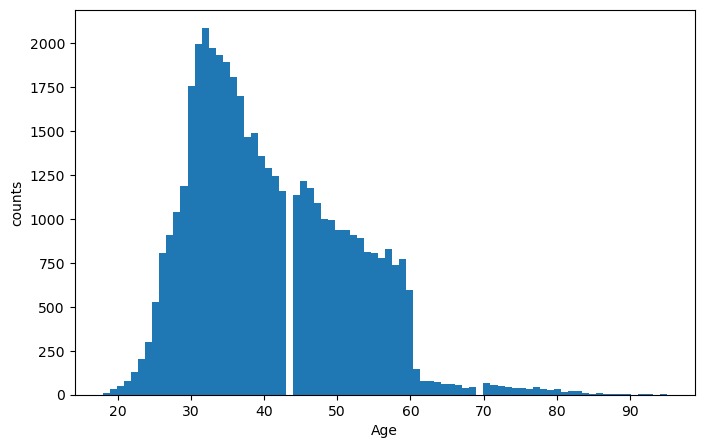

In [113]:
plt.figure(figsize = (8,5))
plt.xlabel('Age')
plt.ylabel("counts")
plt.hist(num_data['age'],bins = 80)
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Numerical_data_frequency_table\\age_counts_chart.jpg')
plt.show()

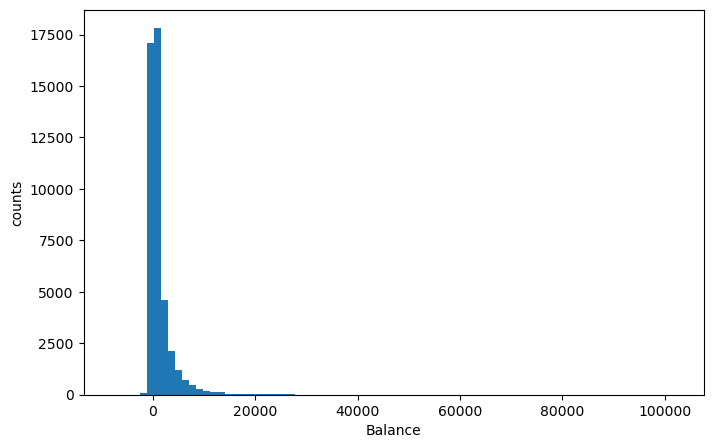

In [114]:
plt.figure(figsize = (8,5))
plt.xlabel('Balance')
plt.ylabel("counts")
plt.hist(num_data['balance'],bins = 80)
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Numerical_data_frequency_table\\Balance_counts_chart.jpg')
plt.show()

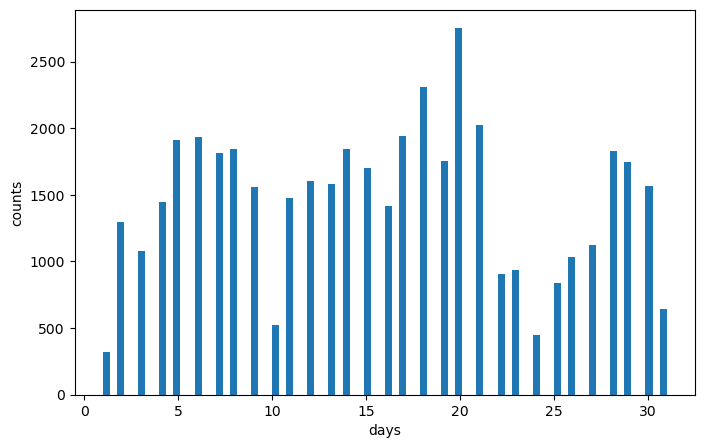

In [115]:
plt.figure(figsize = (8,5))
plt.xlabel('days')
plt.ylabel("counts")
plt.hist(num_data['day'],bins = 80)
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Numerical_data_frequency_table\\days_counts_chart.jpg')
plt.show()

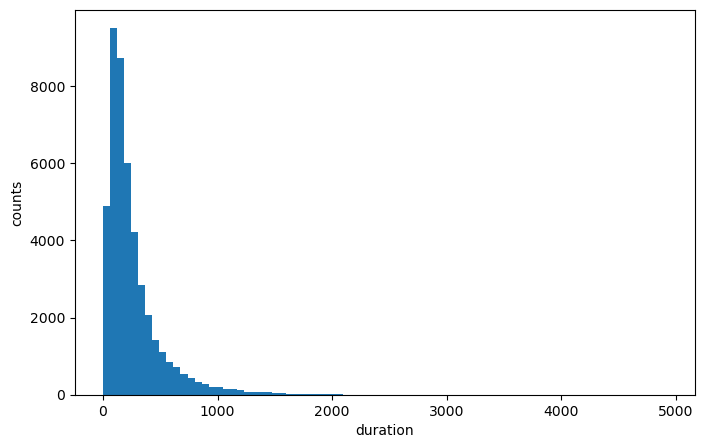

In [116]:
plt.figure(figsize = (8,5))
plt.xlabel('duration')
plt.ylabel("counts")
plt.hist(num_data['duration'],bins = 80)
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Numerical_data_frequency_table\\duration_counts_chart.jpg')
plt.show()

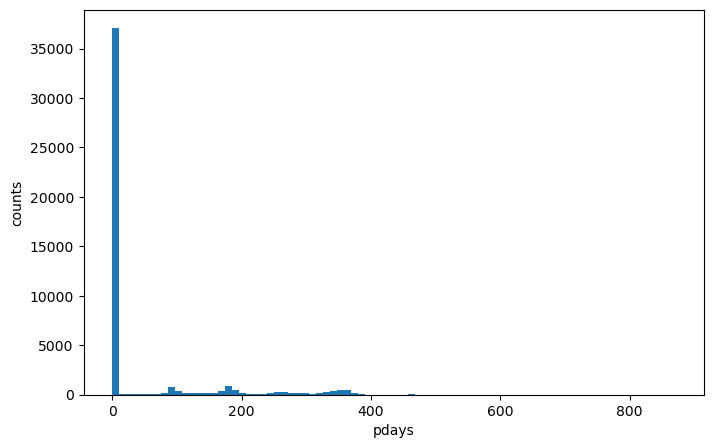

In [117]:
plt.figure(figsize = (8, 5))
plt.xlabel('pdays')
plt.ylabel("counts")
plt.hist(num_data['pdays'],bins = 80)
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Numerical_data_frequency_table\\pdays_counts_chart.jpg')
plt.show()

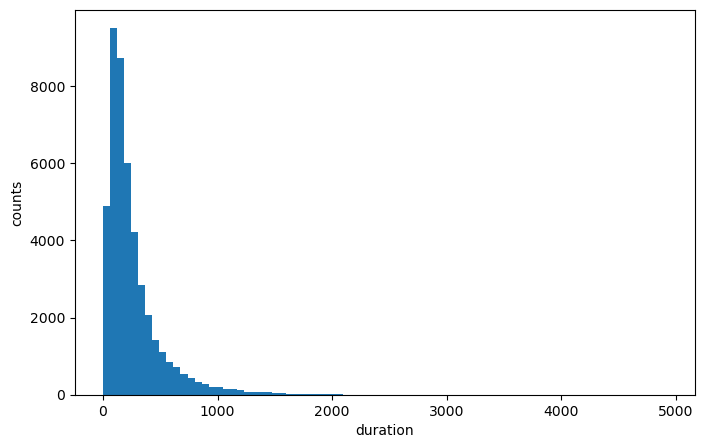

In [118]:
plt.figure(figsize = (8,5))
plt.xlabel('duration')
plt.ylabel("counts")
plt.hist(num_data['duration'],bins = 80)
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Numerical_data_frequency_table\\duration_counts_chart.jpg')
plt.show()

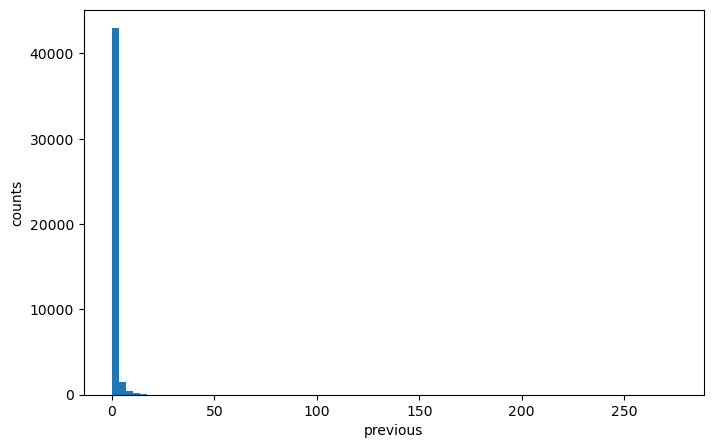

In [119]:
plt.figure(figsize = (8,5))
plt.xlabel('previous')
plt.ylabel("counts")
plt.hist(num_data['previous'],bins = 80)
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Numerical_data_frequency_table\\Previous_counts_chart.jpg')
plt.show()

- Describing the Numerical data

In [120]:
num_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [121]:
# chart created and saved

In [122]:
age = num_data['age']
age

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64

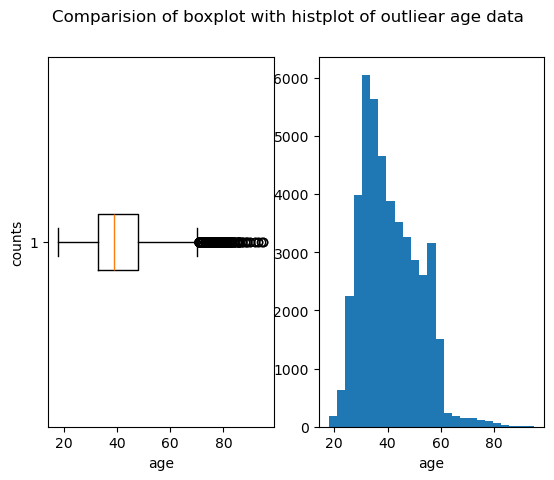

In [123]:
plt.suptitle("Comparision of boxplot with histplot of outliear age data")
plt.subplot(1,2,1)
# plt.xlable('age')
plt.boxplot(age,vert=False)
plt.xlabel('age')
plt.ylabel('counts')
plt.subplot(1,2,2)
plt.hist(age, bins = 25)
plt.xlabel('age')
# plt.ylabel('counts')
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Numerical_data_frequency_table\\Comparision of boxplot with histplot of outliear age data.jpg')

plt.show()

- Outlier handling

In [124]:
path = os.getcwd()
folder_name = 'Outlear_data_chart'
new_dir = os.path.join(path, folder_name)                 # folder created
try:
    os.makedirs(new_dir)
except Exception as e:
    print("Can't create Folder")

In [125]:
q1 = np.percentile(age,25)
q2 = np.percentile(age,50)
q3 = np.percentile(age,75)

In [126]:
IQR = q3-q2          # calculating the iter quartile range

In [127]:
lb = q1-1.5*IQR            # The data which is less then 25% is called lower bound

In [128]:
ub = q3+1.5*IQR          # The data which is greater then 75% is called upper bound

In [129]:
con1 = age < lb # T F
con2 = age > ub # T F      # living the data less then lower bound and the data greater then uper bond
con3 = con1|con2 

In [130]:
age_nonoutlier_data = age[con3]
           # Non-outelier data

In [131]:
os.getcwd()

'C:\\Users\\Pankaj\\Jupyter'

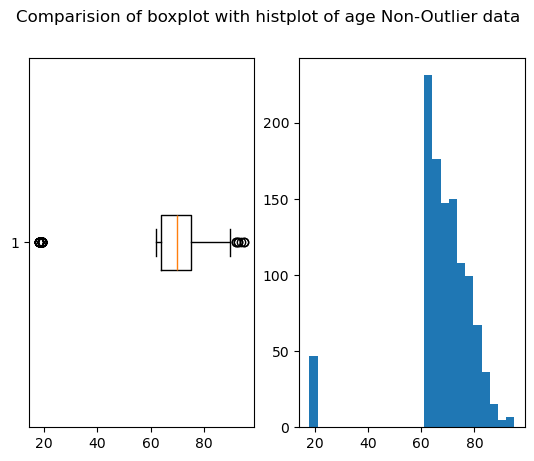

In [132]:
plt.suptitle("Comparision of boxplot with histplot of age Non-Outlier data")
plt.subplot(1,2,1)
plt.boxplot(age_nonoutlier_data,vert=False)
plt.subplot(1,2,2)
plt.hist(age_nonoutlier_data, bins = 25)
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Outlear_data_chart\\Comparision of boxplot with histplot of non-outlear age data.jpg')
plt.show()

In [133]:
balance = num_data['balance']
balance

0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64

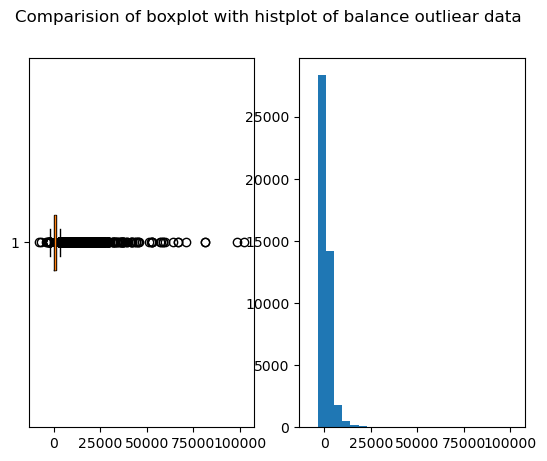

In [134]:
plt.suptitle("Comparision of boxplot with histplot of balance outliear data")
plt.subplot(1,2,1)
plt.boxplot(balance,vert=False)
plt.subplot(1,2,2)
plt.hist(balance, bins = 25)
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Numerical_data_frequency_table\\Comparision of boxplot with histplot of outliear balance data.jpg')
plt.show()

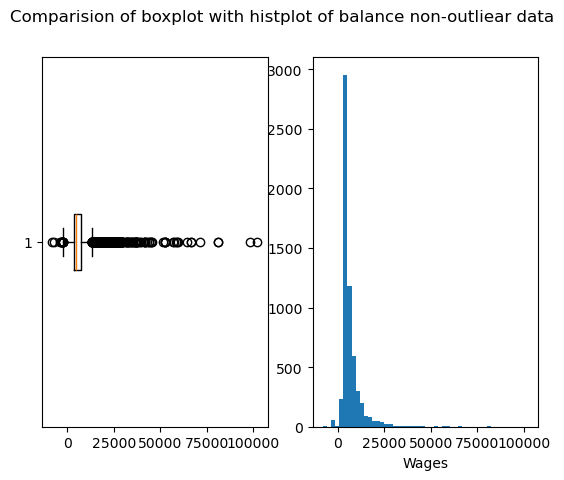

In [135]:

q1 = np.percentile(balance,25)
q2 = np.percentile(balance,50)
q3 = np.percentile(balance,75)
IQR = q3-q2          # calculating the iter quartile range
lb = q1-1.5*IQR            # The data which is less then 25% is called lower bound
ub = q3+1.5*IQR          # The data which is greater then 75% is called upper bound
con1 = balance < lb # T F
con2 = balance > ub # T F      # living the data less then lower bound and the data greater then uper bond
con3 = con1|con2 
balance_nonoutlier_data = balance[con3]
           # Non-outelier data
# plt.suptitle("Comparision of boxplot with histplot of balance Non-Outlier data")
plt.subplot(1,2,1)
plt.suptitle('Comparision of boxplot with histplot of balance non-outliear data')
plt.boxplot(balance_nonoutlier_data,vert=False)
plt.subplot(1,2,2)
plt.hist(balance_nonoutlier_data, bins = 50)
plt.xlabel('Wages')
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Outlear_data_chart\\Comparision of boxplot with histplot of non_outliear balance data.jpg')
plt.show()

In [136]:
day = num_data['day']
day

0         5
1         5
2         5
3         5
4         5
         ..
45206    17
45207    17
45208    17
45209    17
45210    17
Name: day, Length: 45211, dtype: int64

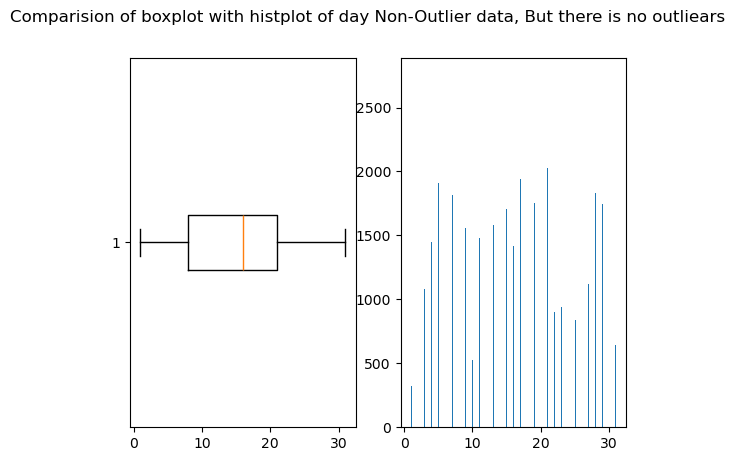

In [137]:
plt.suptitle("Comparision of boxplot with histplot of day Non-Outlier data, But there is no outliears ")
plt.subplot(1,2,1)
plt.boxplot(day,vert=False)
plt.subplot(1,2,2)
plt.hist(day, bins = 250)
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Outlear_data_chart\\Comparision of boxplot with histplot of day data.jpg')
plt.show()

In [138]:
num_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

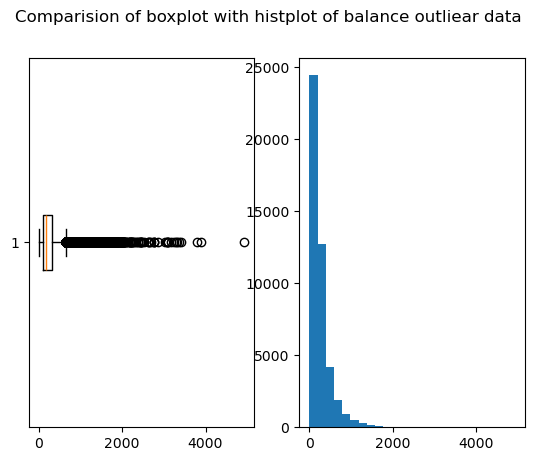

In [139]:
duration = num_data['duration']
plt.suptitle("Comparision of boxplot with histplot of balance outliear data")
plt.subplot(1,2,1)
plt.boxplot(duration,vert=False)
plt.subplot(1,2,2)
plt.hist(duration, bins = 25)
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Numerical_data_frequency_table\\Comparision of boxplot with histplot of outliear duration data.jpg')
plt.show()

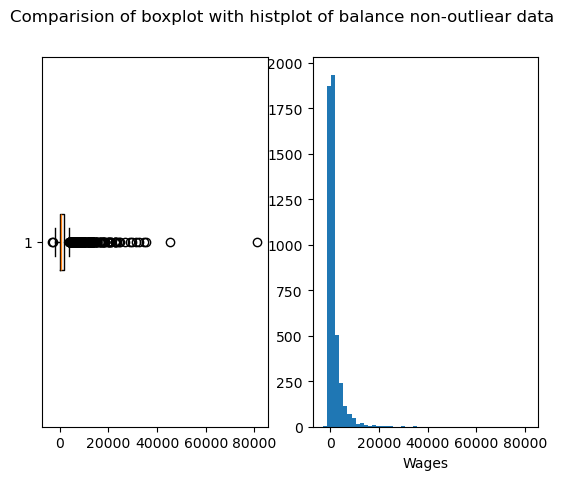

In [140]:
q1 = np.percentile(duration,25)
q2 = np.percentile(duration,50)
q3 = np.percentile(duration,75)
IQR = q3-q2          # calculating the iter quartile range
lb = q1-1.5*IQR            # The data which is less then 25% is called lower bound
ub = q3+1.5*IQR          # The data which is greater then 75% is called upper bound
con1 = duration < lb # T F
con2 = duration > ub # T F      # living the data less then lower bound and the data greater then uper bond
con3 = con1|con2 
balance_nonoutlier_data = balance[con3]
           # Non-outelier data
# plt.suptitle("Comparision of boxplot with histplot of balance Non-Outlier data")
plt.subplot(1,2,1)
plt.suptitle('Comparision of boxplot with histplot of balance non-outliear data')
plt.boxplot(balance_nonoutlier_data,vert=False)
plt.subplot(1,2,2)
plt.hist(balance_nonoutlier_data, bins = 50)
plt.xlabel('Wages')
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Outlear_data_chart\\Comparision of boxplot with histplot of balance outilear data.jpg')
plt.show()

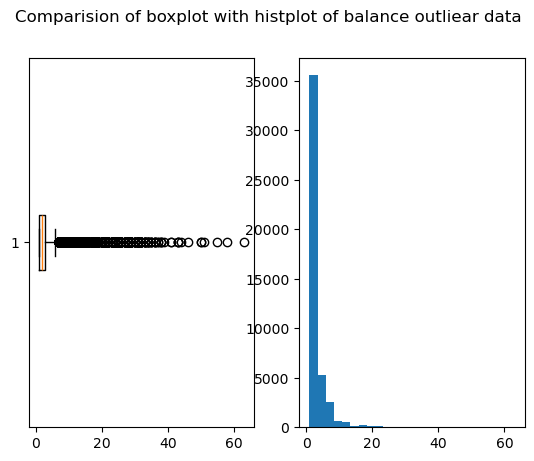

In [141]:
campaign = num_data['campaign']
plt.suptitle("Comparision of boxplot with histplot of balance outliear data")
plt.subplot(1,2,1)
plt.boxplot(campaign,vert=False)
plt.subplot(1,2,2)
plt.hist(campaign, bins = 25)
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Numerical_data_frequency_table\\Comparision of boxplot with histplot of outliear campaign data.jpg')
plt.show()

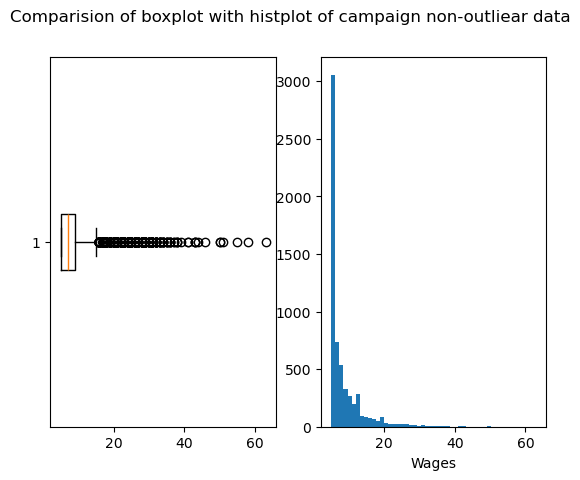

In [142]:
q1 = np.percentile(campaign,25)
q2 = np.percentile(campaign,50)
q3 = np.percentile(campaign,75)
IQR = q3-q2          # calculating the iter quartile range
lb = q1-1.5*IQR            # The data which is less then 25% is called lower bound
ub = q3+1.5*IQR          # The data which is greater then 75% is called upper bound
con1 = campaign < lb # T F
con2 = campaign > ub # T F      # living the data less then lower bound and the data greater then uper bond
con3 = con1|con2 
campaign_nonoutlier_data = campaign[con3]
           # Non-outelier data
# plt.suptitle("Comparision of boxplot with histplot of balance Non-Outlier data")
plt.subplot(1,2,1)
plt.suptitle('Comparision of boxplot with histplot of campaign non-outliear data')
plt.boxplot(campaign_nonoutlier_data,vert=False)
plt.subplot(1,2,2)
plt.hist(campaign_nonoutlier_data, bins = 50)
plt.xlabel('Wages')
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Outlear_data_chart\\Comparision of boxplot with histplot of campaign non-outilear data.jpg')
plt.show()

In [143]:
num_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

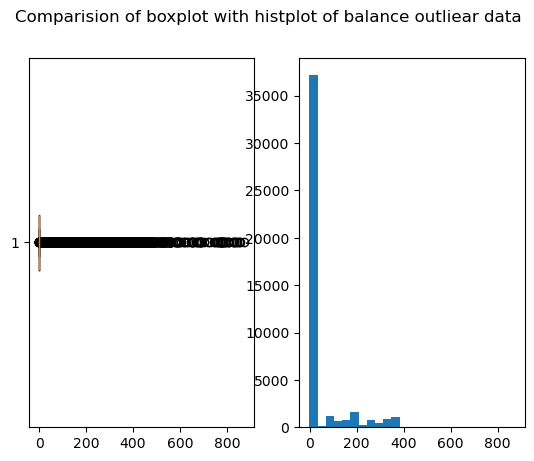

In [144]:
pdays = num_data['pdays']
plt.suptitle("Comparision of boxplot with histplot of balance outliear data")
plt.subplot(1,2,1)
plt.boxplot(pdays,vert=False)
plt.subplot(1,2,2)
plt.hist(pdays, bins = 25)
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Numerical_data_frequency_table\\Comparision of boxplot with histplot of outliear pdays data.jpg')
plt.show()

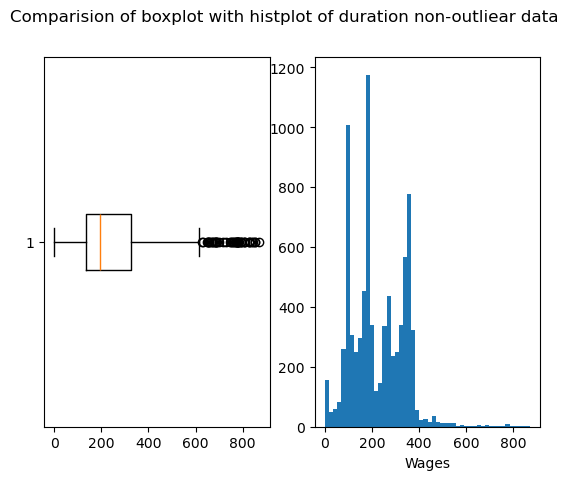

In [145]:
q1 = np.percentile(pdays,25)
q2 = np.percentile(pdays,50)
q3 = np.percentile(pdays,75)
IQR = q3-q2          # calculating the iter quartile range
lb = q1-1.5*IQR            # The data which is less then 25% is called lower bound
ub = q3+1.5*IQR          # The data which is greater then 75% is called upper bound
con1 = pdays < lb # T F
con2 = pdays > ub # T F      # living the data less then lower bound and the data greater then uper bond
con3 = con1|con2 
pdays_nonoutlier_data = pdays[con3]
           # Non-outelier data
# plt.suptitle("Comparision of boxplot with histplot of balance Non-Outlier data")
plt.subplot(1,2,1)
plt.suptitle('Comparision of boxplot with histplot of duration non-outliear data')
plt.boxplot(pdays_nonoutlier_data,vert=False)
plt.subplot(1,2,2)
plt.hist(pdays_nonoutlier_data, bins = 50)
plt.xlabel('Wages')
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Outlear_data_chart\\Comparision of boxplot with histplot of pdays outilear data.jpg')
plt.show()

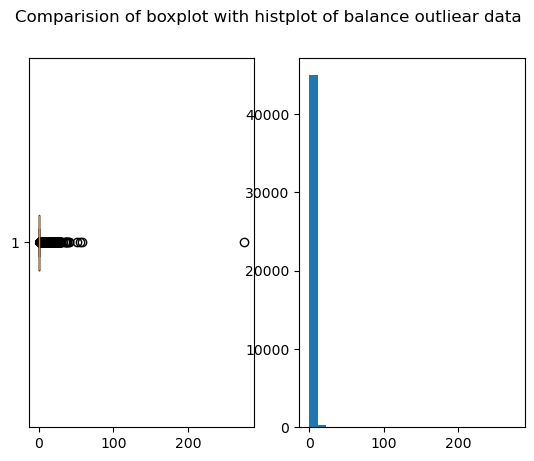

In [146]:
previous = num_data['previous']
plt.suptitle("Comparision of boxplot with histplot of balance outliear data")
plt.subplot(1,2,1)
plt.boxplot(previous,vert=False)
plt.subplot(1,2,2)
plt.hist(previous, bins = 25)
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Numerical_data_frequency_table\\Comparision of boxplot with histplot of outliear previous data.jpg')
plt.show()

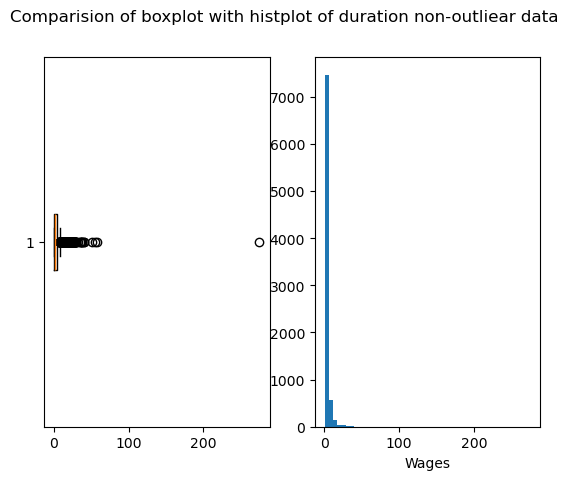

In [147]:
q1 = np.percentile(previous,25)
q2 = np.percentile(previous,50)
q3 = np.percentile(previous,75)
IQR = q3-q2          # calculating the iter quartile range
lb = q1-1.5*IQR            # The data which is less then 25% is called lower bound
ub = q3+1.5*IQR          # The data which is greater then 75% is called upper bound
con1 = previous < lb # T F
con2 = previous > ub # T F      # living the data less then lower bound and the data greater then uper bond
con3 = con1|con2 
previous_nonoutlier_data = previous[con3]
           # Non-outelier data
# plt.suptitle("Comparision of boxplot with histplot of balance Non-Outlier data")
plt.subplot(1,2,1)
plt.suptitle('Comparision of boxplot with histplot of duration non-outliear data')
plt.boxplot(previous_nonoutlier_data,vert=False)
plt.subplot(1,2,2)
plt.hist(previous_nonoutlier_data, bins = 50)
plt.xlabel('Wages')
plt.savefig('C:\\Users\\Pankaj\\Jupyter\\Outlear_data_chart\\Comparision of boxplot with histplot of previous outilear data.jpg')
plt.show()